In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from  tensorflow.keras.layers import Dense,Flatten

In [25]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [28]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [29]:
x_test.shape

(10000, 28, 28)

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

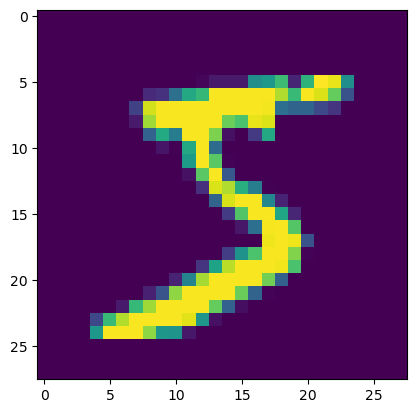

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [37]:
x_train = x_train/255
x_test = x_test/255

In [38]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [82]:
history = model.fit(x_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.1414 - val_accuracy: 0.9747
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1238 - val_accuracy: 0.9777
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1186 - val_accuracy: 0.9790
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.1298 - val_accuracy: 0.9763
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.1374 - val_accuracy: 0.9764
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.1445 - val_accuracy: 0.9756
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1350 - val_accuracy:

In [83]:
y_prob = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [84]:
y_pred = y_prob.argmax(axis=1)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9806

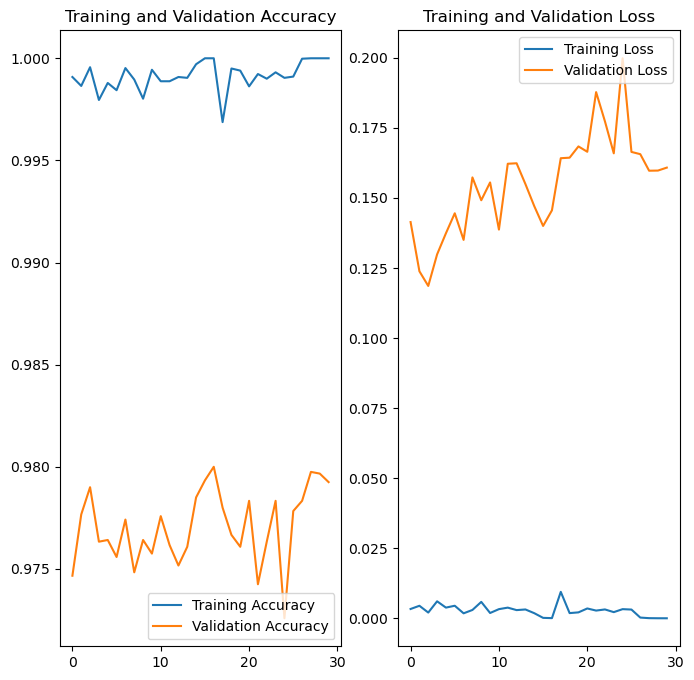

In [91]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


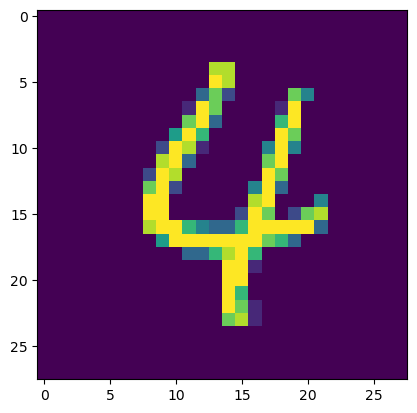

In [92]:
plt.imshow(x_test[109])

In [93]:
model.predict(x_test[109].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([4], dtype=int64)

In [96]:
model.save("Handwritten_digit_recognition_system.h5")